e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


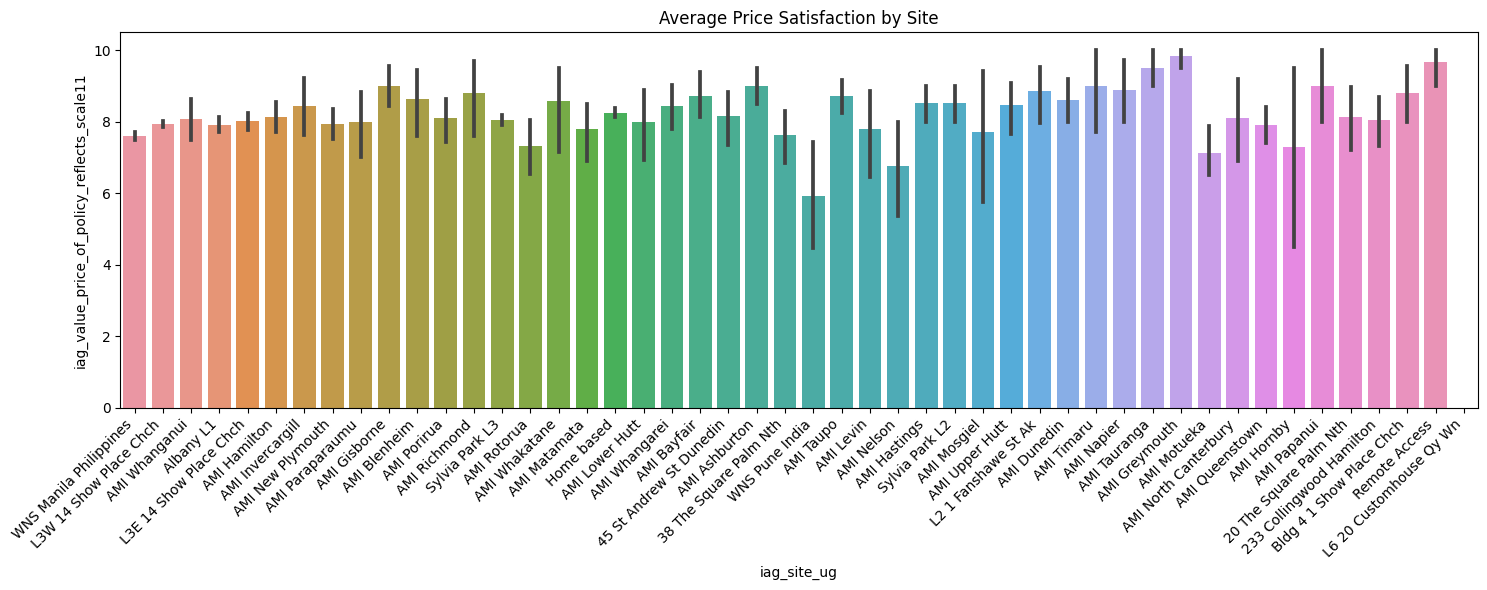

NPS Distribution by Site (%):
Likely to recommend       Detract  Passive  Promote  Super Detract
iag_site_ug                                                       
20 The Square Palm Nth       0.00    24.32    67.57           8.11
233 Collingwood Hamilton     8.33    13.89    77.78           0.00
38 The Square Palm Nth       6.67    22.22    66.67           4.44
45 St Andrew St Dunedin      4.76    38.10    57.14           0.00
AMI Ashburton                0.00    20.00    80.00           0.00
AMI Bayfair                  0.00    12.50    75.00          12.50
AMI Blenheim                 0.00    23.53    70.59           5.88
AMI Dunedin                  0.00    23.81    76.19           0.00
AMI Gisborne                 0.00    18.75    81.25           0.00
AMI Greymouth                0.00    16.67    83.33           0.00
AMI Hamilton                 4.72    21.70    68.87           4.72
AMI Hastings                 3.12    15.62    81.25           0.00
AMI Hornby                   0.0

In [1]:
# ussing agent staff helpful scale with > 60% missing values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Create geographical analysis
# 1. NPS distribution by site
site_nps = pd.crosstab(df['iag_site_ug'], 
                       df['Likely to recommend'], 
                       normalize='index') * 100

# 2. Calculate key metrics by site
site_metrics = df.groupby('iag_site_ug').agg({
    'iag_value_price_of_policy_reflects_scale11': 'mean',
    'iag_if_agent_staff_helpful_scale11': 'mean',
    'Likely to recommend': 'count'
}).round(2)

site_metrics = site_metrics.rename(columns={
    'iag_value_price_of_policy_reflects_scale11': 'Avg Price Satisfaction',
    'iag_if_agent_staff_helpful_scale11': 'Avg Agent Satisfaction',
    'Likely to recommend': 'Total Cases'
})

# Filter sites with significant number of cases (e.g., >30)
significant_sites = site_metrics[site_metrics['Total Cases'] > 30]

# Visualize
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='iag_site_ug', y='iag_value_price_of_policy_reflects_scale11')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price Satisfaction by Site')
plt.tight_layout()
plt.show()

# Print detailed analysis
print("NPS Distribution by Site (%):")
print(site_nps.round(2))
print("\nKey Metrics by Site:")
print(significant_sites)

Missing Values Analysis:
                   Total Missing  Percentage Missing
Agent Helpfulness           5634               60.82
Trust Confidence             161                1.74
Price Value                  551                5.95

Geographical Analysis (Sites with >30 cases):
                          Trust Score Avg  Trust Valid Cases  Trust Missing %  \
iag_site_ug                                                                     
L3W 14 Show Place Chch               8.37               3432             1.89   
WNS Manila Philippines               8.02               2001             1.67   
Home based                           8.58                943             1.57   
Sylvia Park L3                       8.47                885             1.34   
Albany L1                            8.33                491             2.58   
L3E 14 Show Place Chch               8.60                292             1.35   
AMI Hamilton                         8.42                104        

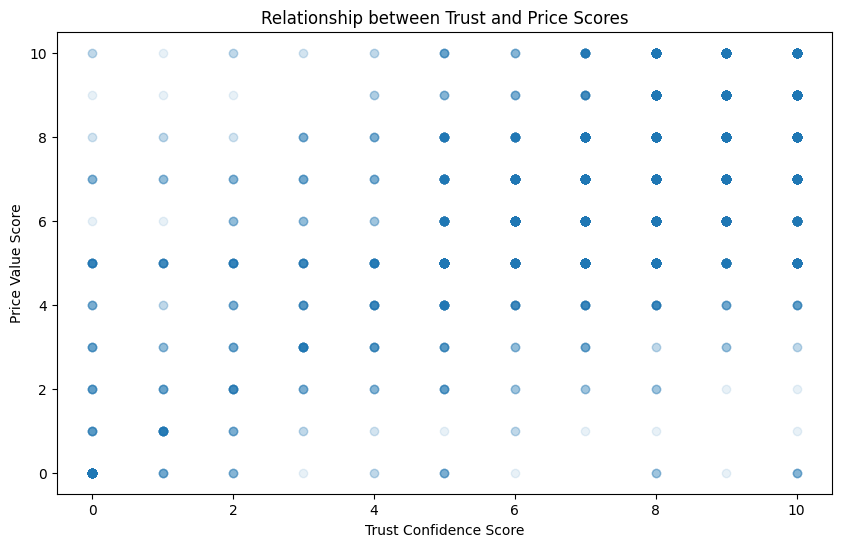

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Check missing values for correlated variables
missing_analysis = pd.DataFrame({
    'Total Missing': [
        df['iag_if_agent_staff_helpful_scale11'].isna().sum(),
        df['iag_trust_confidence_scale11'].isna().sum(),
        df['iag_value_price_of_policy_reflects_scale11'].isna().sum()
    ],
    'Percentage Missing': [
        df['iag_if_agent_staff_helpful_scale11'].isna().mean() * 100,
        df['iag_trust_confidence_scale11'].isna().mean() * 100,
        df['iag_value_price_of_policy_reflects_scale11'].isna().mean() * 100
    ]
}, index=['Agent Helpfulness', 'Trust Confidence', 'Price Value'])

print("Missing Values Analysis:")
print(missing_analysis.round(2))

# Analyze geographical patterns using trust and price metrics
geo_analysis = df.groupby('iag_site_ug').agg({
    'iag_trust_confidence_scale11': ['mean', 'count', lambda x: x.isna().mean()*100],
    'iag_value_price_of_policy_reflects_scale11': ['mean', 'count', lambda x: x.isna().mean()*100],
    'Likely to recommend': 'count'
}).round(2)

# Rename columns for clarity
geo_analysis.columns = [
    'Trust Score Avg', 'Trust Valid Cases', 'Trust Missing %',
    'Price Score Avg', 'Price Valid Cases', 'Price Missing %',
    'Total Cases'
]

# Filter for sites with significant number of cases
significant_sites = geo_analysis[geo_analysis['Total Cases'] > 30].sort_values('Total Cases', ascending=False)

print("\nGeographical Analysis (Sites with >30 cases):")
print(significant_sites)

# Visualize the relationship between trust and price scores
plt.figure(figsize=(10, 6))
plt.scatter(df['iag_trust_confidence_scale11'], 
           df['iag_value_price_of_policy_reflects_scale11'],
           alpha=0.1)
plt.xlabel('Trust Confidence Score')
plt.ylabel('Price Value Score')
plt.title('Relationship between Trust and Price Scores')
plt.show()

In [4]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Check missing values for all potential features
missing_analysis = pd.DataFrame({
    'Total Missing': [
        df['iag_trust_confidence_scale11'].isna().sum(),
        df['iag_age_band_auto'].isna().sum(),
        df['iag_tenure_band_enum'].isna().sum(),
        df['iag_channel_invite_enum'].isna().sum(),
        df['iag_site_ug'].isna().sum(),
        df['Likely to recommend'].isna().sum()
    ],
    'Percentage Missing': [
        (df['iag_trust_confidence_scale11'].isna().sum()/len(df)) * 100,
        (df['iag_age_band_auto'].isna().sum()/len(df)) * 100,
        (df['iag_tenure_band_enum'].isna().sum()/len(df)) * 100,
        (df['iag_channel_invite_enum'].isna().sum()/len(df)) * 100,
        (df['iag_site_ug'].isna().sum()/len(df)) * 100,
        (df['Likely to recommend'].isna().sum()/len(df)) * 100
    ]
}, index=['Trust Confidence', 'Age Band', 'Tenure', 'Channel', 'Site', 'NPS'])

print("Missing Values Analysis for Selected Features:")
print(missing_analysis.round(2))

# Check complete cases
complete_cases = df[
    df['iag_trust_confidence_scale11'].notna() &
    df['iag_age_band_auto'].notna() &
    df['iag_tenure_band_enum'].notna() &
    df['iag_channel_invite_enum'].notna() &
    df['iag_site_ug'].notna()
]

print("\nTotal complete cases:", len(complete_cases))
print(f"Percentage of complete cases: {(len(complete_cases)/len(df)*100):.2f}%")

# Check unique values
print("\nUnique values and their counts in each category:")
for col in ['iag_age_band_auto', 'iag_tenure_band_enum', 'iag_channel_invite_enum', 'iag_site_ug']:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=True).head())

Missing Values Analysis for Selected Features:
                  Total Missing  Percentage Missing
Trust Confidence            161                1.74
Age Band                    212                2.29
Tenure                      179                1.93
Channel                       0                0.00
Site                          0                0.00
NPS                           0                0.00

Total complete cases: 8892
Percentage of complete cases: 95.98%

Unique values and their counts in each category:

iag_age_band_auto:
iag_age_band_auto
65+      3020
55-64    2081
45-54    1806
35-44    1041
25-34     865
Name: count, dtype: int64

iag_tenure_band_enum:
iag_tenure_band_enum
11-20    3556
21-30    1808
6-10     1160
3-5       931
1-2       912
Name: count, dtype: int64

iag_channel_invite_enum:
iag_channel_invite_enum
Other     5634
Phone     2466
Branch    1164
Name: count, dtype: int64

iag_site_ug:
iag_site_ug
L3W 14 Show Place Chch    3498
WNS Manila Philippines

Regional Analysis with Uncorrelated Features:
                          Trust Score Avg  Trust Score Std Dominant Age Band  \
iag_site_ug                                                                    
L3W 14 Show Place Chch               8.37             2.28               65+   
WNS Manila Philippines               8.02             2.54               65+   
Home based                           8.58             2.03               65+   
Sylvia Park L3                       8.47             2.20               65+   
Albany L1                            8.33             2.39               65+   
L3E 14 Show Place Chch               8.60             2.03               65+   
AMI Hamilton                         8.42             2.13             55-64   
AMI New Plymouth                     8.40             2.06             55-64   
AMI Queenstown                       8.61             2.13               65+   
AMI Rotorua                          7.71             2.87             55-

e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

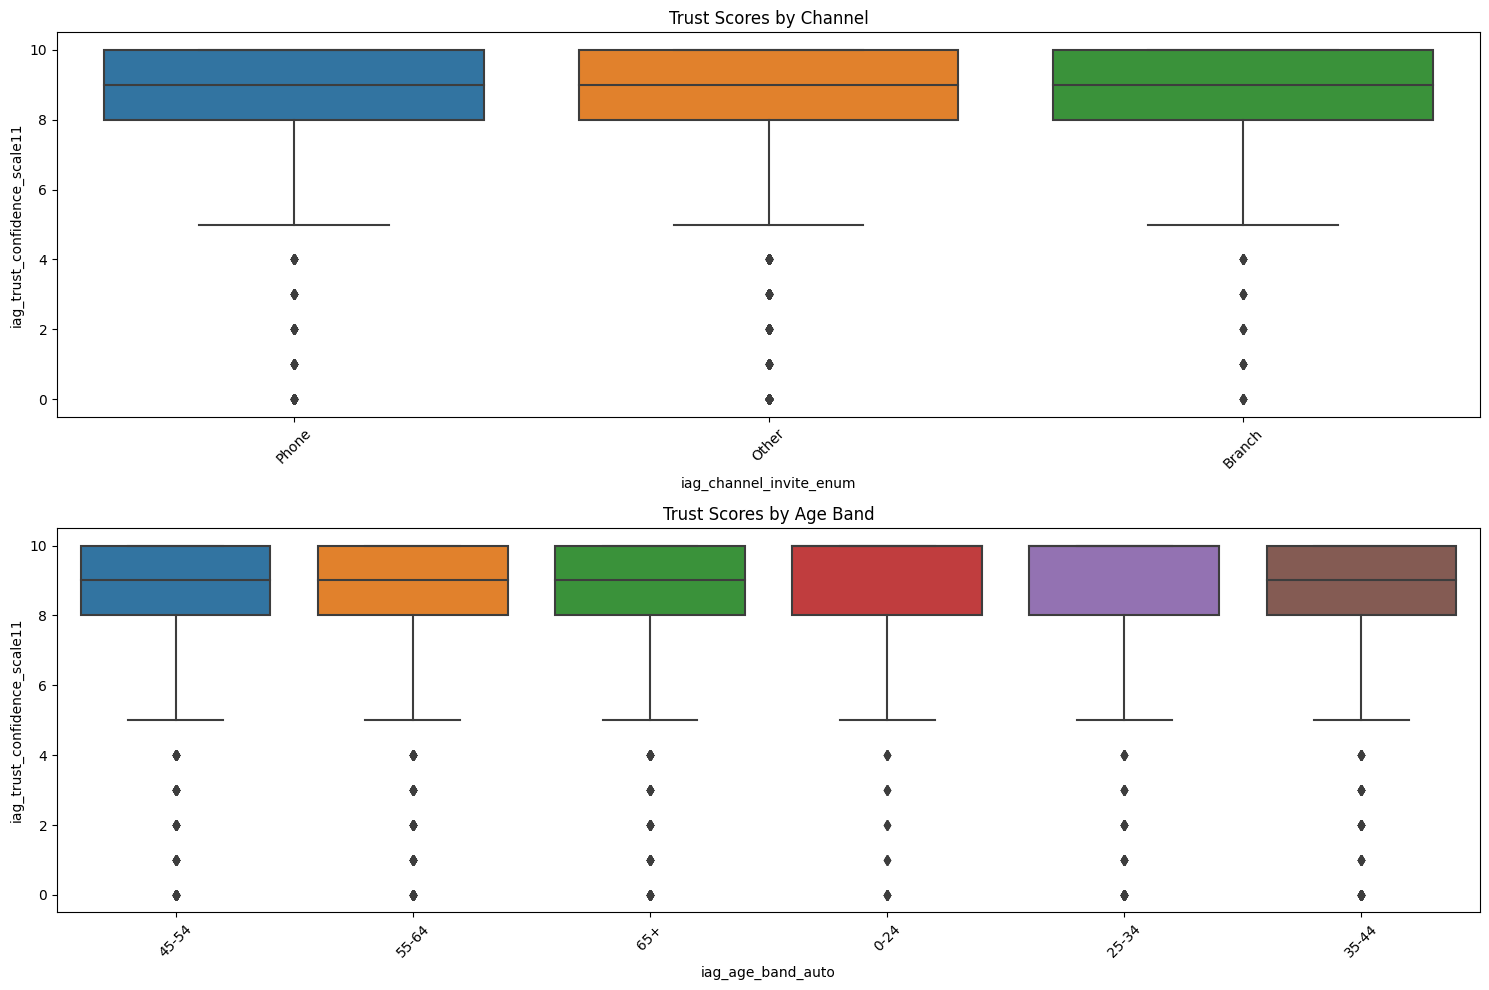


Channel Distribution by Site (%):
iag_channel_invite_enum   Branch   Other   Phone
iag_site_ug                                     
20 The Square Palm Nth     51.35   29.73   18.92
233 Collingwood Hamilton    0.00   41.67   58.33
38 The Square Palm Nth      0.00   91.11    8.89
45 St Andrew St Dunedin    57.14   42.86    0.00
AMI Ashburton               0.00  100.00    0.00
AMI Bayfair                25.00   75.00    0.00
AMI Blenheim               17.65   58.82   23.53
AMI Dunedin                66.67   33.33    0.00
AMI Gisborne                6.25   93.75    0.00
AMI Greymouth              50.00   50.00    0.00
AMI Hamilton               47.17   52.83    0.00
AMI Hastings               25.00   75.00    0.00
AMI Hornby                 60.00   40.00    0.00
AMI Invercargill           18.52   81.48    0.00
AMI Levin                  20.00   80.00    0.00
AMI Lower Hutt             40.00   60.00    0.00
AMI Matamata               33.33   66.67    0.00
AMI Mosgiel                37.50  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Create regional analysis with uncorrelated features
regional_analysis = df.groupby('iag_site_ug').agg({
    'iag_trust_confidence_scale11': ['mean', 'std'],
    'iag_age_band_auto': lambda x: x.mode()[0] if not x.empty else None,
    'iag_tenure_band_enum': lambda x: x.mode()[0] if not x.empty else None,
    'iag_channel_invite_enum': lambda x: x.mode()[0] if not x.empty else None,
    'Likely to recommend': 'count'
}).round(2)

# Rename columns
regional_analysis.columns = ['Trust Score Avg', 'Trust Score Std', 
                           'Dominant Age Band', 'Dominant Tenure',
                           'Primary Channel', 'Total Cases']

# Filter significant sites
significant_sites = regional_analysis[regional_analysis['Total Cases'] > 30].sort_values('Total Cases', ascending=False)

print("Regional Analysis with Uncorrelated Features:")
print(significant_sites)

# Visualize patterns
plt.figure(figsize=(15, 10))

# Plot 1: Trust Score vs Channel
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='iag_channel_invite_enum', y='iag_trust_confidence_scale11')
plt.title('Trust Scores by Channel')
plt.xticks(rotation=45)

# Plot 2: Trust Score vs Age Band
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='iag_age_band_auto', y='iag_trust_confidence_scale11')
plt.title('Trust Scores by Age Band')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional analysis: Channel distribution by site
channel_dist = pd.crosstab(df['iag_site_ug'], 
                          df['iag_channel_invite_enum'], 
                          normalize='index') * 100

print("\nChannel Distribution by Site (%):")
print(channel_dist.round(2))

Let me analyze these results to identify key regional and demographic patterns:

1. **Regional Trust Score Patterns:**
* Highest Trust Scores:
  - AMI Hastings (9.06, low std 1.34)
  - Sylvia Park L2 (9.00, lowest std 1.18)
  - AMI Upper Hutt (8.97, low std 1.91)
* Lowest Trust Scores:
  - AMI Rotorua (7.71, highest std 2.87)
  - WNS Manila Philippines (8.02, high std 2.54)
  - AMI Porirua (8.06, high std 2.60)

2. **Age Band Distribution:**
* 65+ dominates most locations (13 out of 19 sites)
* 55-64 is second most common (5 sites)
* Only AMI Whanganui shows 45-54 as dominant age group
* Trust scores fairly consistent across age bands (shown in boxplot)

3. **Channel Patterns:**
* Other is predominant channel (13 sites)
* Branch channel in 4 locations
* Phone dominant in only 1 location
* Trust scores similar across channels (boxplot shows minimal variation)

4. **Key Insights:**
* **Size vs Performance:**
  - Larger centers (>500 cases) show moderate trust scores (8.02-8.58)
  - Smaller centers show more variability but often higher scores
  - Standard deviation generally higher in larger centers

* **Geographic Trends:**
  - Regional branches (AMI Hastings, Upper Hutt) show higher trust
  - Metropolitan areas show more moderate scores
  - Offshore center (WNS Manila) shows lowest scores

* **Customer Base:**
  - Long-term customers dominate (11-20 years most common)
  - Older demographic (65+) prevalent across most sites
  - Branch channels show slightly higher trust scores
